In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)

import graphcat.notebook
import imagecat.notebook

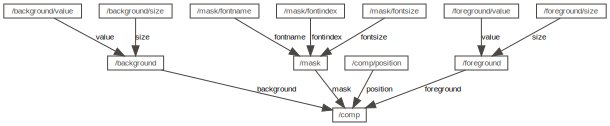

INFO:imagecat:Task /foreground solid C size [256 256] value [0 0 0] result C(256x256x3 float16)
INFO:imagecat:Task /background solid C size [512 512] value [1.  0.5 0. ] result C(512x512x3 float16)
INFO:imagecat:Task /mask text anchor mm fontindex 4 fontname HelveticaNeue fontsize 0.33vh plane A position ('0.5vw', '0.5vh') size [256 256] result A(256x256x1 float16)
INFO:imagecat:Task /comp comp C(256x256x3 float16) over C(512x512x3 float16) mask A(256x256x1 float16) orientation 0.0 position ('0.5vw', '0.8vh') result C(512x512x3 float16)



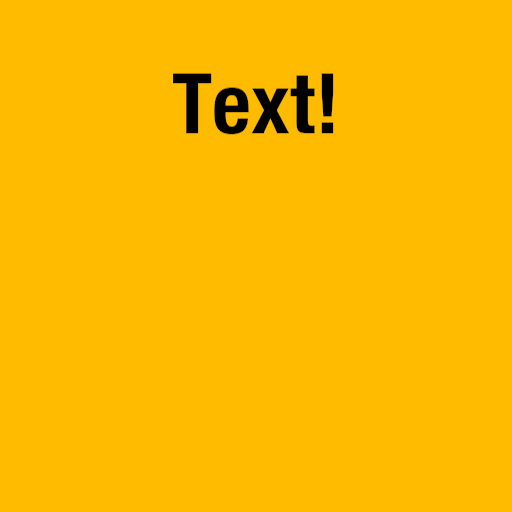

In [10]:
graph = graphcat.Graph()
imagecat.add_operation(graph, "/foreground", imagecat.solid, value=[0, 0, 0], size=[256, 256])
imagecat.add_operation(graph, "/background", imagecat.solid, value=[1, 0.5, 0], size=[512, 512])
imagecat.add_operation(graph, "/mask", imagecat.text, fontname="HelveticaNeue", fontindex=4, fontsize="0.33vh")
imagecat.add_operation(graph, "/comp", imagecat.composite, position=("0.5vw", "0.8vh"))
graph.set_links("/foreground", ("/comp", "foreground"))
graph.set_links("/background", ("/comp", "background"))
graph.set_links("/mask", ("/comp", "mask"))

graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output("/comp"))